In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, concatenate, Input, ZeroPadding2D
from tensorflow.keras import activations, Sequential
import graphviz

2024-01-05 21:21:48.230560: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-05 21:21:48.262247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 21:21:48.262275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 21:21:48.263352: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 21:21:48.268652: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-05 21:21:48.269175: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
class Discriminator:
    
    def __init__(self, shape_of_image):
        self.input_layer = Input(shape=shape_of_image, name='input_image')
        self.target_layer = Input(shape=shape_of_image, name='target_image')
        # size of new input -> (256, 256, 6)
        self.current_layer = concatenate([self.input_layer, self.target_layer])

        initializer = tf.random_normal_initializer(0., 0.02)
        
        d1 = self.downsample(64, 4)
        d2 = self.downsample(128, 4)
        d3 = self.downsample(256, 4)

        sequential = Sequential()
        zero_padding_1 = ZeroPadding2D()(d3)
        conv = Conv2D(filters=512, kernel_size=4, strides=1, kernel_initializer=initializer)(zero_padding_1)
        batch_norm = BatchNormalization()(conv)
        activation = Activation(activations.relu)(batch_norm)
        zero_padding_2 = ZeroPadding2D()(activation)

        self.output_layer = Conv2D(filters=1, kernel_size=4, strides=1, kernel_initializer=initializer)(zero_padding_2)
        self.model = keras.Model(inputs=[self.input_layer, self.target_layer], outputs=self.output_layer)

    def downsample(self, filters, kernel_size):
        initializer = tf.random_normal_initializer(0., 0.02)
        
        sequential = Sequential()
        conv = Conv2D(filters=filters, kernel_size=kernel_size, strides=2, padding='same', kernel_initializer=initializer)
        norm = BatchNormalization()
        activation = Activation(activations.relu)
        
        sequential.add(conv)
        sequential.add(norm)
        sequential.add(activation)

        self.current_layer = sequential(self.current_layer)
        return self.current_layer
        

In [3]:
discriminator = Discriminator((256, 256, 3)).model
discriminator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 target_image (InputLayer)   [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 256, 256, 6)          0         ['input_image[0][0]',         
                                                                     'target_image[0][0]']        
                                                                                                  
 sequential (Sequential)     (None, 128, 128, 64)         6464      ['concatenate[0][0]']     

2024-01-05 21:21:51.357585: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


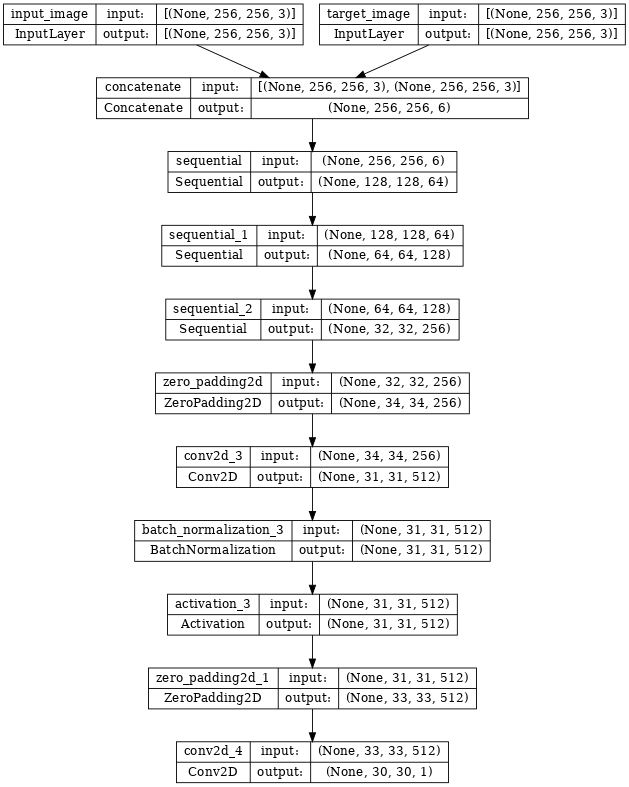

In [4]:
keras.utils.plot_model(discriminator, show_shapes=True, dpi=64, to_file='../images/discriminatorModel.png')